In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('AustralianVehiclePrices.csv')
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


# Análise de Frequencia e Percentual

In [57]:
# Tratamento no Dataset para deixar a metrica price como numero
price_number = pd.to_numeric(data['Price'], errors='coerce')


In [58]:
# Definindo as Classes baseadas no preço dos carros
classes = [
    price_number.min(),
    40000,
    60000,
    100000,
    150000,
    price_number.max()
]
classes

[88.0, 40000, 60000, 100000, 150000, 1500000.0]

In [59]:
# As Labels é como cada classe se chamara
labels = [
    'Carro Popular A',
    'Carro Popular B',
    'Carro Popular C',
    'Carro Semi-Luxo',
    'Carro de Luxo'
]
labels

['Carro Popular A',
 'Carro Popular B',
 'Carro Popular C',
 'Carro Semi-Luxo',
 'Carro de Luxo']

In [60]:
# Montando a tabela de frequencia, basicamente serve para vermos quantos carros de cada categoria foi vendido no ano de 2022
frequencia = pd.value_counts(
  pd.cut(x = price_number,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

C:\Users\Cauã Palugan Coelho\AppData\Local\Temp\ipykernel_24412\3002458519.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


Price
Carro Popular A    11800
Carro Popular B     2901
Carro Popular C     1434
Carro Semi-Luxo      318
Carro de Luxo        228
Name: count, dtype: int64

In [61]:
# Nessa parte pegamos as mesmas informações de cimna, porem mostrando em porcentagem para melhor visualização
percentual = pd.value_counts(
    pd.cut(x = price_number,
           bins = classes,
           labels = labels,
           include_lowest = True
           ),
    normalize = True
) * 100
percentual

C:\Users\Cauã Palugan Coelho\AppData\Local\Temp\ipykernel_24412\237392202.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Price
Carro Popular A    70.739164
Carro Popular B    17.391044
Carro Popular C     8.596607
Carro Semi-Luxo     1.906361
Carro de Luxo       1.366825
Name: proportion, dtype: float64

In [62]:
# Aqui nos juntamos as duas vistas para que for ver a análise ter uma melhor dimensão
dist_frequencia_price = pd.DataFrame(
    {'Frequencia': frequencia, 'Porcentagem (%)': percentual}
)
dist_frequencia_price

,Frequencia,Porcentagem (%)
Price,,
Carro Popular A,11800,70.739164
Carro Popular B,2901,17.391044
Carro Popular C,1434,8.596607
Carro Semi-Luxo,318,1.906361
Carro de Luxo,228,1.366825


<Axes: xlabel='Price'>

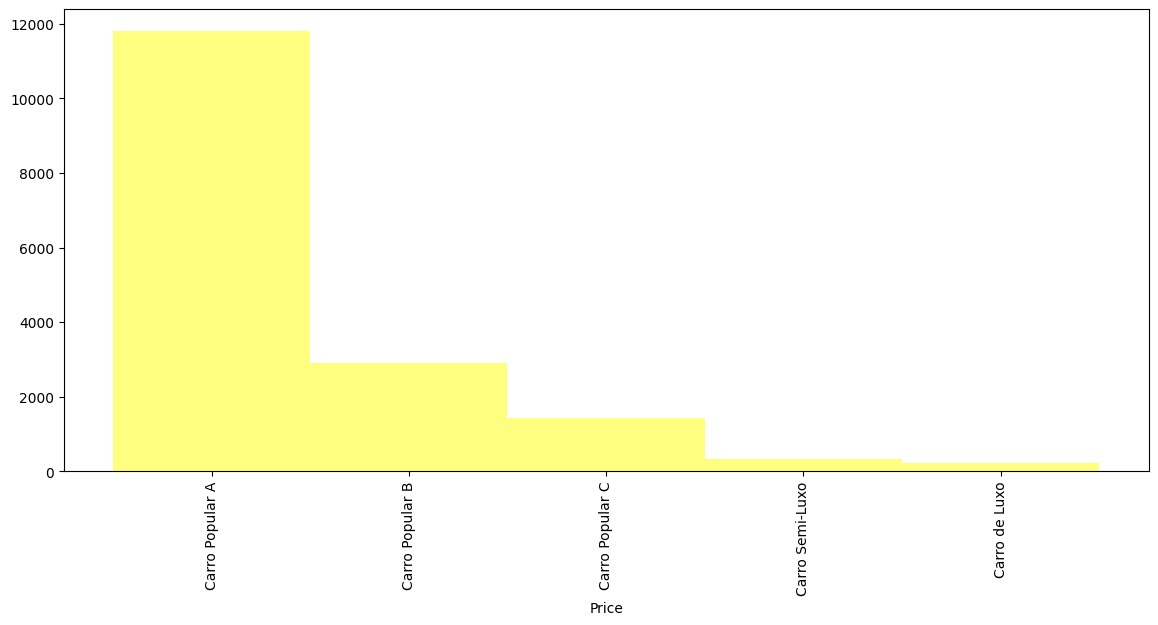

In [63]:
# Alem dos numeros tambem tem um grafico para ficar bem entendivel ate para quem não tem muita familiaridade com isso
dist_frequencia_price['Frequencia'].plot.bar(width = 1, color = 'yellow', alpha = 0.5, figsize=(14, 6))

> ### Conclusões

Depois dessa primeira análise focada em Frequencia e Percentual nós ja podemos tirar alguns insights:
- 70% da população optou por comprar carros de até A$40.000,00, classificados como Carros Populares A.
- A fatia de carros populares englobou mais de 95% do mercado automotivo no ano de 2022.
- Apenans 3% da população comprou carros de Semi-Luxo ou de Luxo, provavelmente podemos concluir que isso foi por conta do preço super faturado.


-------

# Análises baseadas em Histogramas

 Nessa parte tive que trocar o DataSet, pois o que eu estava utilizando não tinha as informações necessarias para continuar as análises de variaveis quantitativas

In [65]:
# Este DataSet e de uma pesquisa com chefes de familias, onde tem bastante dados nos possibilitando explora-los de diversas maneiras
dados = pd.read_csv('dados.csv')

C:\Users\Cauã Palugan Coelho\AppData\Local\Temp\ipykernel_24412\854545715.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Idade'])
c:\Users\Cauã Palugan Coelho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cauã Palugan Coelho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versio

<Axes: title={'center': 'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='Density'>

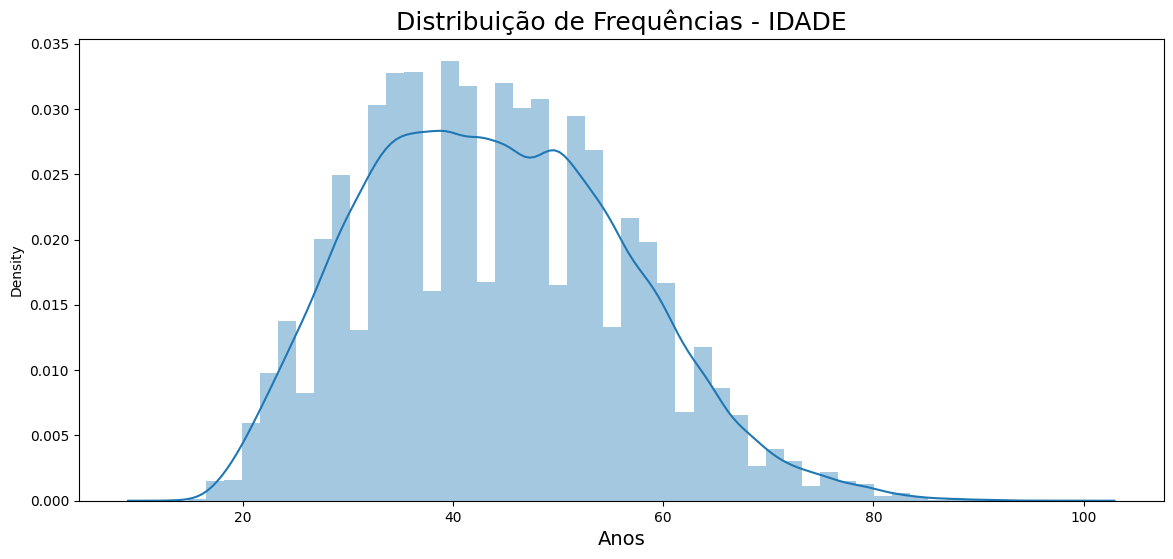

In [71]:
# Aqui estamos fazendo um grafico baseado na Idade das pessoas que participaram da pesquisa, para que tenhamos um entendimento mais visual
ax = sns.distplot(dados['Idade'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

C:\Users\Cauã Palugan Coelho\AppData\Local\Temp\ipykernel_24412\3941023768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Altura'])
c:\Users\Cauã Palugan Coelho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cauã Palugan Coelho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future vers

<Axes: title={'center': 'Distribuição de Frequências - ALTURA'}, xlabel='Metros', ylabel='Density'>

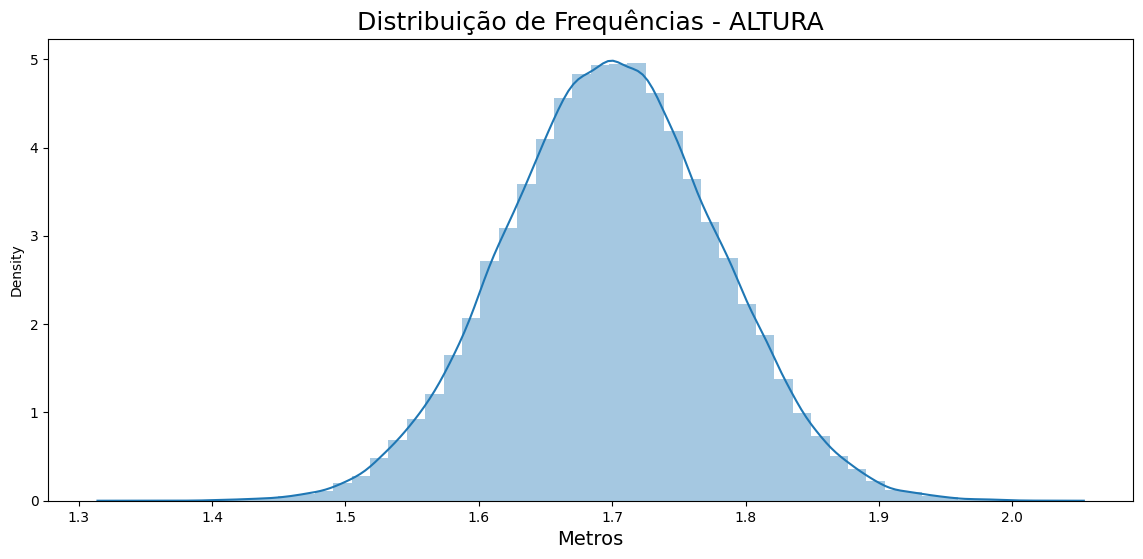

In [67]:
# Aqui estamos fazendo um grafico baseado na Altura das pessoas que participaram da pesquisa, para que tenhamos um entendimento mais visual
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - ALTURA', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

C:\Users\Cauã Palugan Coelho\AppData\Local\Temp\ipykernel_24412\1977691281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 15000').Renda)
c:\Users\Cauã Palugan Coelho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Cauã Palugan Coelho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

<Axes: title={'center': 'Distribuição de Frequências - RENDA'}, xlabel='R$', ylabel='Density'>

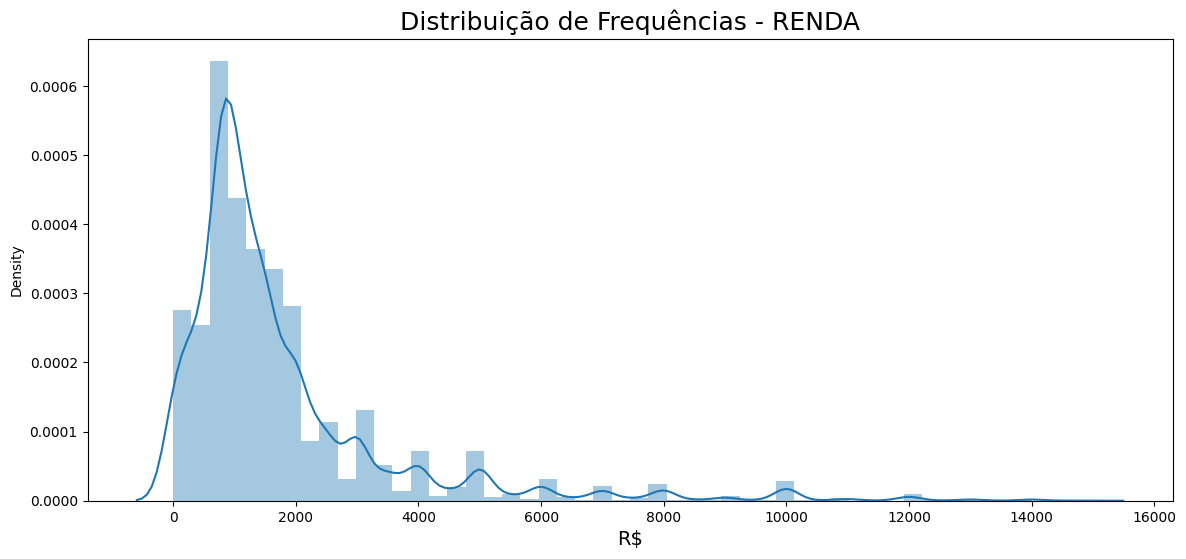

In [69]:
# Aqui estamos fazendo um grafico baseado na Renda das pessoas que participaram da pesquisa, para que tenhamos um entendimento mais visual.
# Porem como a uma grande distancia desde a primeira ate a ultima Renda, nós botamos uma regra para que so apareça no grafico pessoa com renda
# menor que 15000
ax = sns.distplot(dados.query('Renda < 15000').Renda)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

O que podemos observar dessa análise de histogramas é que:
- Na variável Idade podemos observar uma assimetria a direita, assim a média de idade de chefes de família sendo maior do que a moda e a mediana.
- Na variável Altura podemos ver um gráfico simétrico, o que é o buscado em todas as escalas, onde a moda, media e mediana estão niveladas.
- Na variável Renda podemos observar uma assimetria a direita, assim a média de renda de chefes de família sendo maior do que a moda e a mediana.

------

# Análise com cruzamento de dados

In [73]:
# Criei esse dicionario para substituir os nomes das tabelas que vamos criar abaixo
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}

In [74]:
# Criando a tabela de Frequencia cruzando os dados entre Sexo e Cor, para obter mais insights
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor
                        )
frequencia.rename(index= sexo, inplace=True)
frequencia.rename(columns= cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [75]:
# Criando a tabela de Percentual cruzando os dados entre Sexo e Cor, para obter mais insights
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True
                        ) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Com mais essa análise podemos tirar outros insights:
- A maior parte do povo brasileiro é Pardo ficando com uma parcela de quase 47% da população.
- Os Amarelos e Indigenas não compoem nem 1% da sociedade brasileira.


----

# Análise Descritiva


In [85]:
# Neste primeiro momento estou calculando a Média das Rendas familiares
print('A média da renda das familias é: {0:.2f}'.format(dados.Renda.mean()))

A média da renda das familias é: 2000.38


In [86]:
# Neste segundo momento estou calculando a Mediana das Rendas familiares
print('A mediana da renda das familias é: {0:.2f}'.format(dados.Renda.median()))

A mediana da renda das familias é: 1200.00


In [88]:
# Neste terceiro momento estou calculando a Moda das Rendas familiares
print('A moda da renda das familias é: {0:.2f}'.format(dados.Renda.mode()[0]))

A moda da renda das familias é: 788.00


In [91]:
# Agora nós vamos para algumas análises um pouco mais especificas, para isso vamos importar a biblioteca Numpy
import numpy as np

In [103]:
# Vamos começar analisando o Desvio Medio Absoluto da nossa variavel Renda
mad = np.abs(dados['Renda'] - dados['Renda'].mean()).mean()

print('O Desvio Medio Absoluto da variavel Renda é: {0:.2f}'.format(mad))

O Desvio Medio Absoluto da variavel Renda é: 1526.50


In [105]:
# Aqui vamos calcular a Variância
print('A Variância da variavel Renda é: {0:.2f}'.format(dados.Renda.var()))

A Variância da variavel Renda é: 11044906.01


In [106]:
# Aqui vamos calcular o Desvio-Padrão
print('O Desvio-Padrão da variavel Renda é: {0:.2f}'.format(dados.Renda.std()))

O Desvio-Padrão da variavel Renda é: 3323.39


In [107]:
# Depois de sabermos essas informações vamos fazer uma análise descritiva baseada nas variaveis Cor e Sexo, para podermos tirar alguns insights
analise_descritiva = pd.crosstab(dados.Cor, 
                                dados.Sexo, 
                                values = dados.Renda, 
                                aggfunc = {'mean', 'median', 'max'})
analise_descritiva.rename(index = cor, inplace = True)
analise_descritiva.rename(columns = sexo, inplace = True)
analise_descritiva

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Com essa Análise descritiva podemos ver alguns outros insights:
- A media da Renda Masculina dos Indigenas é menor do que a media Feminina.
- A maior mediana de Renda e dos Homens Amarelos.